In [2]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(),".."))
sys.path.append(project_root)

In [16]:
import pandas as pd
import numpy as np


BITS_12 = 2**12
N_BINS = 512

dfs_SiPM58_BG = []
dfs_SiPM58_BG.append(pd.read_csv('../data/260209/1_SiPM_ChannelsTest_Ch5-8_Ch2_CT_Thr1_cmisvoffset127_Background.csv'))
dfs_SiPM58_BG.append(pd.read_csv('../data/260209/2_SiPM_ChannelsTest_Ch5-8_Ch6_CT_Thr1_cmisvoffset127_Background.csv'))
dfs_SiPM58_BG.append(pd.read_csv('../data/260209/3_SiPM_ChannelsTest_Ch5-8_Ch10_CT_Thr1_cmisvoffset127_Background.csv'))
dfs_SiPM58_BG.append(pd.read_csv('../data/260209/4_SiPM_ChannelsTest_Ch5-8_Ch14_CT_Thr1_cmisvoffset127_Background.csv'))
times_SiPM58_BG = [119.634, 161.062, 148.920, 164.828]

dfs_SiPM14_BG = []
dfs_SiPM14_BG.append(pd.read_csv('../data/260209/5_SiPM_ChannelsTest_Ch1-4_Ch2_CT_Trh1_cmisvoffset127_Background.csv'))
dfs_SiPM14_BG.append(pd.read_csv('../data/260209/2_SiPM_ChannelsTest_Ch5-8_Ch6_CT_Thr1_cmisvoffset127_Background.csv'))
dfs_SiPM14_BG.append(pd.read_csv('../data/260209/3_SiPM_ChannelsTest_Ch5-8_Ch10_CT_Thr1_cmisvoffset127_Background.csv'))
dfs_SiPM14_BG.append(pd.read_csv('../data/260209/4_SiPM_ChannelsTest_Ch5-8_Ch14_CT_Thr1_cmisvoffset127_Background.csv'))
times_SiPM58_BG = [34.836, 80.792, 54.386, 90.837]

dfs_SiPM14_Cs137 = []
dfs_SiPM14_Cs137.append(pd.read_csv('../data/260209/12_SiPM_ChannelsTest_Ch1-4_Ch2_CT_Thr1_cmisvoffset127_Cs137.csv'))
dfs_SiPM14_Cs137.append(pd.read_csv('../data/260209/11_SiPM_ChannelsTest_Ch1-4_Ch6_CT_Thr1_cmisvoffset127_Cs137.csv'))
dfs_SiPM14_Cs137.append(pd.read_csv('../data/260209/10_SiPM_ChannelsTest_Ch1-4_Ch10_CT_Thr1_cmisvoffset127_Cs137.csv'))
dfs_SiPM14_Cs137.append(pd.read_csv('../data/260209/9_SiPM_ChannelsTest_Ch1-4_Ch14_CT_Thr1_cmisvoffset127_Cs137.csv'))
times_SiPM14_Cs137 = [23.381, 24.606, 24.144, 24.645]

dfs_SiPM58_Cs137 = []
dfs_SiPM58_Cs137.append(pd.read_csv('../data/260209/13_SiPM_ChannelsTest_Ch5-8_Ch2_CT_Thr1_cmisvoffset127_Cs137.csv'))
dfs_SiPM58_Cs137.append(pd.read_csv('../data/260209/14_SiPM_ChannelsTest_Ch5-8_Ch6_CT_Thr1_cmisvoffset127_Cs137.csv'))
dfs_SiPM58_Cs137.append(pd.read_csv('../data/260209/15_SiPM_ChannelsTest_Ch5-8_Ch10_CT_Thr1_cmisvoffset127_Cs137.csv'))
dfs_SiPM58_Cs137.append(pd.read_csv('../data/260209/16_SiPM_ChannelsTest_Ch5-8_Ch14_CT_Thr1_cmisvoffset127_Cs137.csv'))
times_SiPM58_Cs137 = [24.720, 24.916, 24.848, 24.934]

SIPHRA_Ch_list = ['Ch2', 'Ch6', 'Ch10', 'Ch14']
dfs = [dfs_SiPM14_BG, dfs_SiPM14_Cs137, dfs_SiPM58_BG, dfs_SiPM58_Cs137]
data_SiPM_chs = ['1-4', '1-4', '5-8', '5-8']


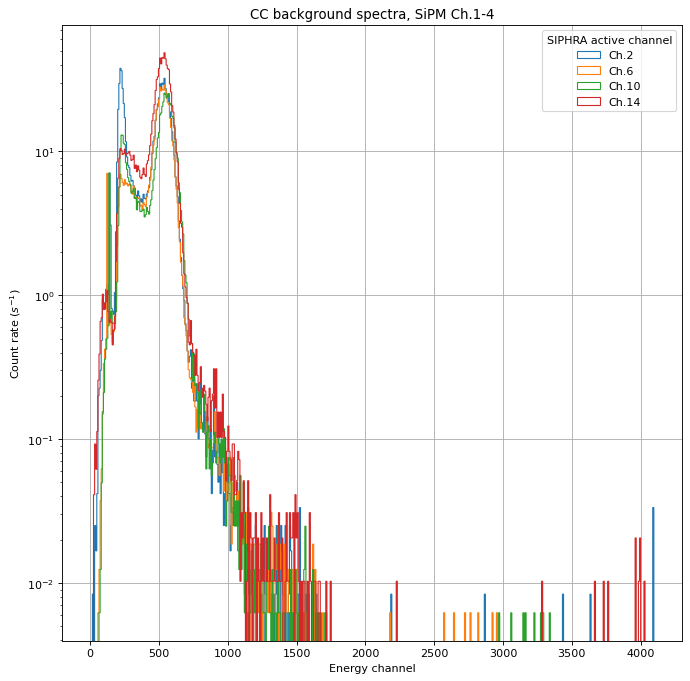

In [19]:
import numpy as np

plt.figure(figsize=(10,10), dpi=80)
legend = ['Ch.2', 'Ch.6', 'Ch.10', 'Ch.14']
for idx,(data, ch) in enumerate(zip(dfs_SiPM14_Cs137, SIPHRA_Ch_list)):
    plt.hist(data[ch], N_BINS, range=(0,BITS_12), weights=(1/times[idx])*np.ones_like(data[ch]), log=True, histtype='step', label=legend[idx])
plt.legend(title="SIPHRA active channel")
plt.xlabel(r'Energy channel')
plt.ylabel(r'Count rate ($s^{-1}$)')
plt.title('CC background spectra, SiPM Ch.1-4')
plt.xticks(np.arange(0,4500,500))
plt.grid()
plt.show()

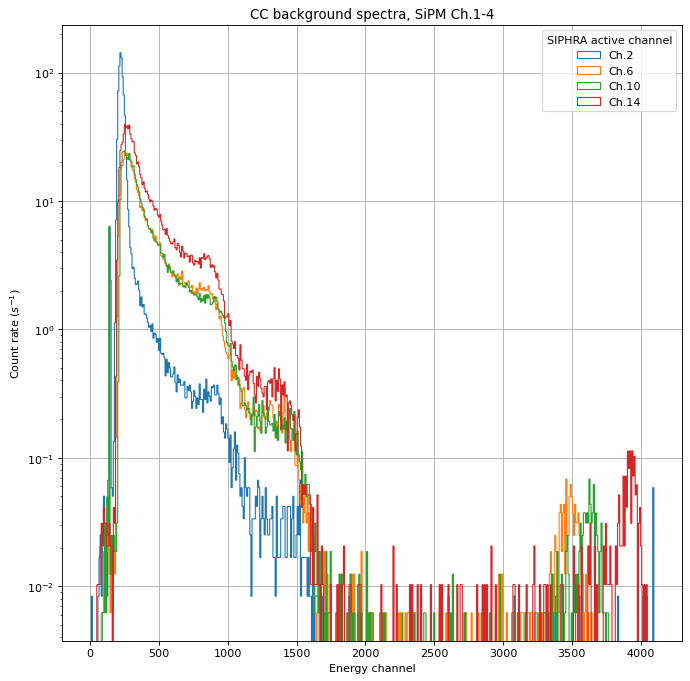

In [20]:
plt.figure(figsize=(10,10), dpi=80)
legend = ['Ch.2', 'Ch.6', 'Ch.10', 'Ch.14']
for idx,(data, ch) in enumerate(zip(dfs_SiPM14_BG, SIPHRA_Ch_list)):
    plt.hist(data[ch], N_BINS, range=(0,BITS_12), weights=(1/times[idx])*np.ones_like(data[ch]), log=True, histtype='step', label=legend[idx])
plt.legend(title="SIPHRA active channel")
plt.xlabel(r'Energy channel')
plt.ylabel(r'Count rate ($s^{-1}$)')
plt.title('CC background spectra, SiPM Ch.1-4')
plt.xticks(np.arange(0,4500,500))
plt.grid()
plt.show()

In [17]:
dfs_ch1_4 = []
dfs_ch1_4.append(pd.read_csv('../data/260204/5_SiPM_ChannelsTest_Ch1-4_Ch2_CT_Thr1_Background.csv'))
dfs_ch1_4.append(pd.read_csv('../data/260204/6_SiPM_ChannelsTest_Ch1-4_Ch6_CT_Thr1_Background.csv'))
dfs_ch1_4.append(pd.read_csv('../data/260204/7_SiPM_ChannelsTest_Ch1-4_Ch10_CT_Thr1_Background.csv'))
dfs_ch1_4.append(pd.read_csv('../data/260204/8_SiPM_ChannelsTest_Ch1-4_Ch14_CT_Thr1_Background.csv'))

dfs_ch1_4 = dfs_ch1_4[::-1]
single_ch_spectra = [df[ch].tolist() for df, ch in zip(dfs_ch1_4, ['Ch14', 'Ch10', 'Ch6', 'Ch2'])]

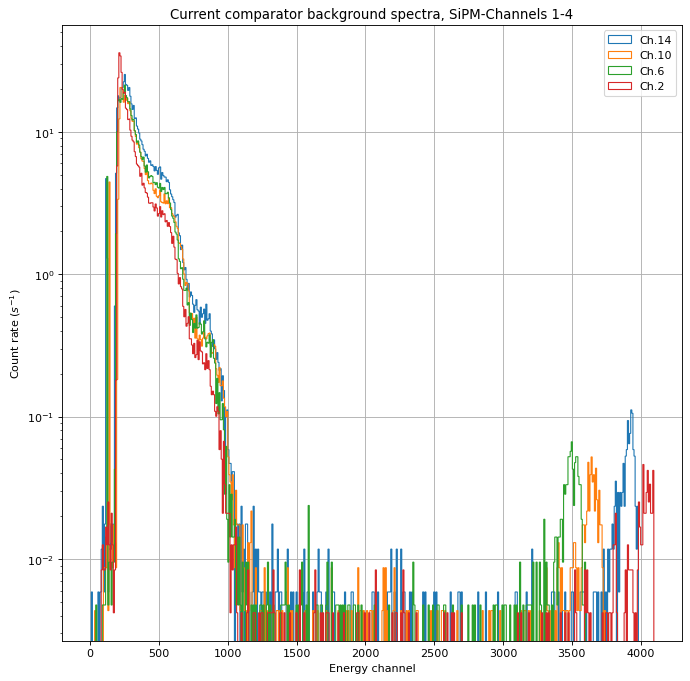

In [22]:
times_ch1_4 = [170.448, 230.292, 210.383, 238.595]
plt.figure(figsize=(10,10), dpi=80)
legend = ['Ch.14', 'Ch.10', 'Ch.6', 'Ch.2']
for idx,s in enumerate(single_ch_spectra):
    plt.hist(s, N_BINS, range=(0,BITS_12), weights=(1/times_ch1_4[idx])*np.ones_like(s), log=True, histtype='step', label=legend[idx])
plt.legend()
plt.xlabel(r'Energy channel')
plt.ylabel(r'Count rate ($s^{-1}$)')
plt.title('Current comparator background spectra, SiPM-Channels 1-4')
plt.xticks(np.arange(0,4500,500))
plt.grid()
plt.show()

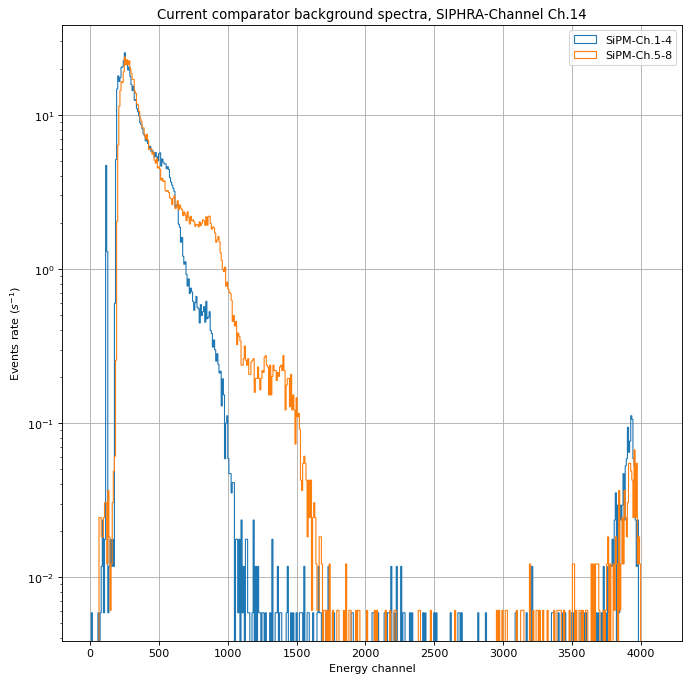

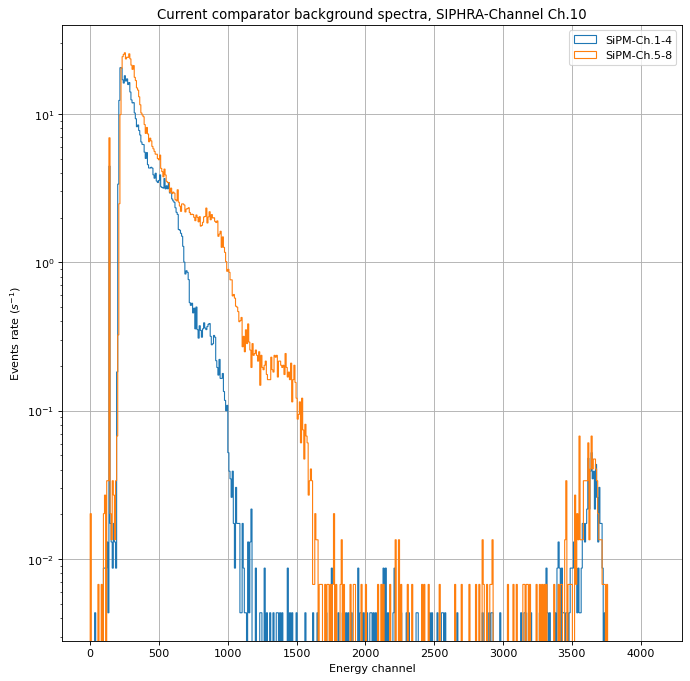

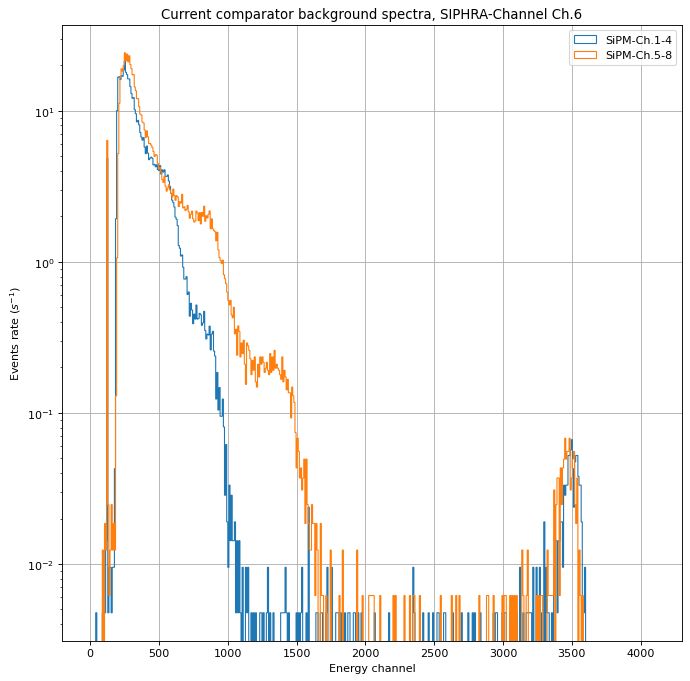

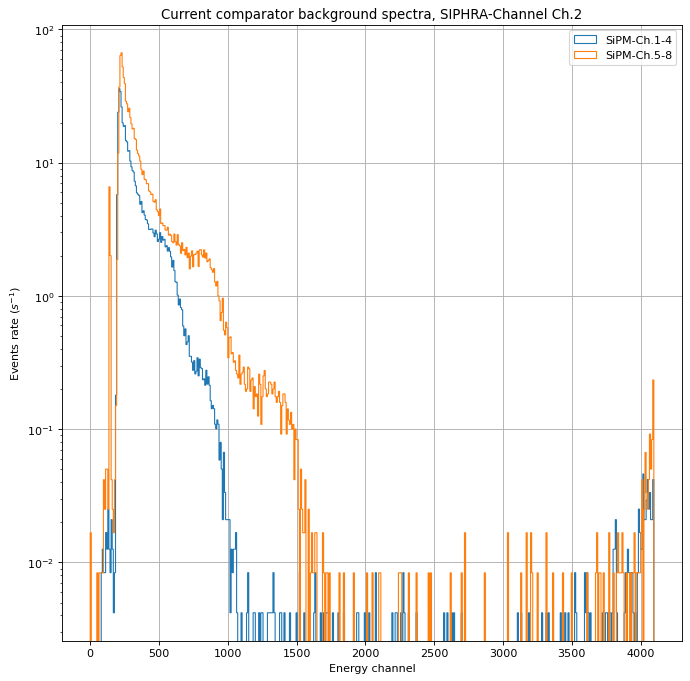

In [36]:
for idx, (spct1, spct2) in enumerate(zip(summed_spectra, single_ch_spectra)):
    plt.figure(figsize=(10,10), dpi=80)
    plt.hist(spct2, N_BINS, range=(0,BITS_12), weights=(1/times_ch1_4[idx])*np.ones_like(spct2), log=True, histtype='step', label='SiPM-Ch.1-4')
    plt.hist(spct1, N_BINS, range=(0,BITS_12), weights=(1/times[idx])*np.ones_like(spct1), log=True, histtype='step', label='SiPM-Ch.5-8')
    plt.legend()
    plt.xlabel(r'Energy channel')
    plt.ylabel(r'Count rate ($s^{-1}$)')
    plt.title('Current comparator background spectra, SIPHRA-Channel '+legend[idx])
    plt.xticks(np.arange(0,4500,500))
    plt.grid()
    plt.show()

# Charge Comparator background spectra

<table style="width:100%">
    <tr>
        <th rowspan="2"><div align="center"> Parameter </div></th>
        <th colspan="2"><div align="center"> Value </div></th>
    </tr>
    <tr>
        <th><div align="center"> Inactive channels </div></th>
        <th><div align="center"> Active channel </div></th>
    </tr>
    <tr>
        <td> ccmis_detector_voffset </td>
        <td colspan=2><div align="center"> 127 </div></td>
    </tr>
    <tr>
        <td> cmis_detector_ioffset </td>
        <td colspan=2><div align="center"> 7 </div></td>
    </tr>
    <tr>
        <td> cc_threshold </td>
        <td colspan=2><div align="center"> 1 </div></td>
</table>